## Kütüphanleri yükleyelim

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import Yusuf2
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso

In [2]:
train_data = pd.read_csv('train.csv')

### Veriyi inceleyelim.

In [3]:
train_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [4]:
train_data.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [5]:
train_data.info()  # tum degerler sayısal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

## Gorselleştirme

In [6]:
train_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

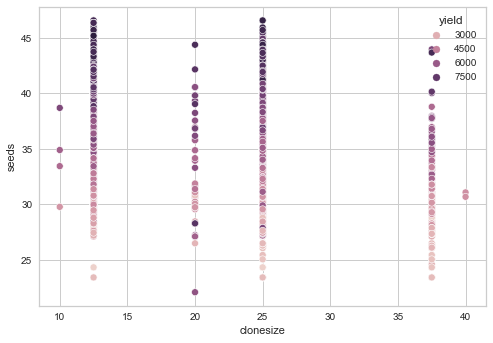

In [7]:
col = ['clonesize', 'honeybee', 'bumbles']
sbn.scatterplot(data = train_data, x = col[0], y = 'seeds', hue = 'yield')
plt.show()

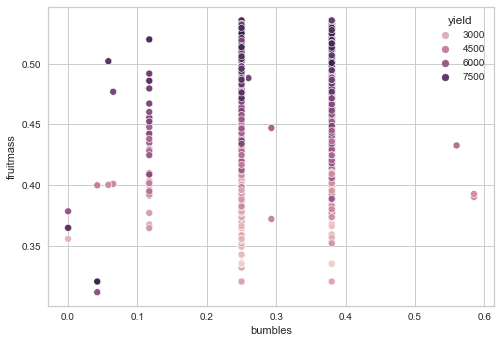

In [8]:
sbn.scatterplot(data = train_data, x = col[2], y = 'fruitmass', hue = 'yield')
plt.show()

## Corelasyon

In [9]:
train_data.drop('id', axis = 1, inplace = True)

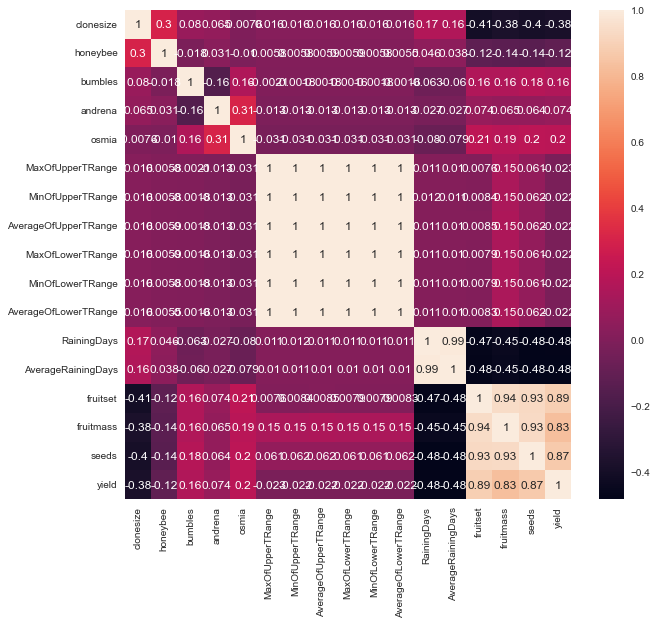

In [10]:
plt.figure(figsize = (10, 9))
sbn.heatmap(train_data.corr(), annot = True);

In [11]:
abs(train_data.corr()['yield']).sort_values(ascending = False)


yield                   1.000000
fruitset                0.885967
seeds                   0.868853
fruitmass               0.826481
AverageRainingDays      0.483870
RainingDays             0.477191
clonesize               0.382619
osmia                   0.198264
bumbles                 0.161145
honeybee                0.118001
andrena                 0.073969
MaxOfUpperTRange        0.022517
MinOfLowerTRange        0.022319
MaxOfLowerTRange        0.022197
AverageOfLowerTRange    0.022081
AverageOfUpperTRange    0.021940
MinOfUpperTRange        0.021929
Name: yield, dtype: float64

In [12]:
corr_col = train_data.columns[abs(train_data.corr()['yield']) > 0.2]

In [13]:
corr_col

Index(['clonesize', 'RainingDays', 'AverageRainingDays', 'fruitset',
       'fruitmass', 'seeds', 'yield'],
      dtype='object')

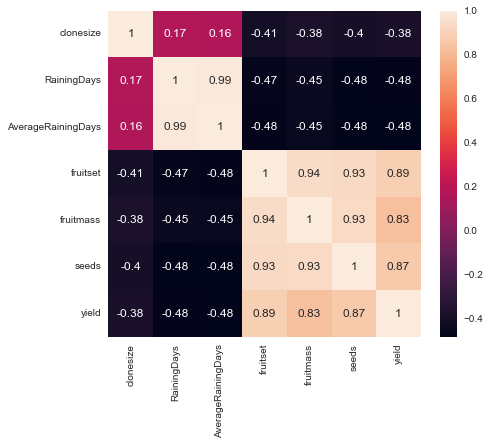

In [14]:
plt.figure(figsize = (7, 6))
sbn.heatmap(train_data[corr_col].corr(), annot = True);

In [15]:
train_df = train_data[corr_col]
train_df

,clonesize,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...
15284,12.5,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,25.0,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


### once Yusuf2 modulune gore regresyon degerlerine bakalım.(hem train_df hem de train_data ' ya gore)

In [16]:
Yusuf2.boslari_doldur_regresyon(train_df, 'yield')

,R2_Score
Lasso,78.225474
Ridge,78.020208
Linear_R,77.889358
Random,75.548693
Decision_T,51.830330
Elastic,29.648137
Support,1.957975


In [17]:
Yusuf2.boslari_doldur_regresyon(train_data, 'yield')

,R2_Score
Lasso,78.341365
Ridge,78.176048
Linear_R,78.083791
Random,77.416692
Decision_T,55.620231
Elastic,30.087806
Support,4.031451


### Şimdi de Derin Öğrenme kullanarak başarıya bakalım.

In [18]:
x1 = train_data.drop('yield', axis = 1)
y1 = train_data['yield']
x2 = train_df.drop('yield', axis = 1)
y2 = train_df['yield']

In [19]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

## model 1

In [25]:
model1 = Sequential()
model1.add(Dense(units = 512, activation = 'relu'))
model1.add(Dense(units = 512, activation = 'relu'))
model1.add(Dense(units = 512, activation = 'relu'))
model1.add(Dense(units = 512, activation = 'relu'))
model1.add(Dense(units = 512, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [26]:
erken_durma = EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min')

In [27]:
history1 = model1.fit(x1_train, y1_train, validation_data = (x1_test, y1_test), 
                    epochs = 100, callbacks = [erken_durma], verbose = 1)

Epoch 1/100
383/383 [==============================] - 8s 17ms/step - loss: 1964802.7500 - mean_squared_error: 1964802.7500 - val_loss: 465391.6250 - val_mean_squared_error: 465391.6250
Epoch 2/100
383/383 [==============================] - 6s 16ms/step - loss: 513356.3750 - mean_squared_error: 513356.3750 - val_loss: 504252.6562 - val_mean_squared_error: 504252.6562
Epoch 3/100
383/383 [==============================] - 6s 16ms/step - loss: 484312.6875 - mean_squared_error: 484312.6875 - val_loss: 442569.0938 - val_mean_squared_error: 442569.0938
Epoch 4/100
383/383 [==============================] - 6s 17ms/step - loss: 486707.0000 - mean_squared_error: 486707.0000 - val_loss: 476052.6250 - val_mean_squared_error: 476052.6250
Epoch 5/100
383/383 [==============================] - 7s 17ms/step - loss: 491629.8438 - mean_squared_error: 491629.8438 - val_loss: 470220.7812 - val_mean_squared_error: 470220.7812
Epoch 6/100
383/383 [==============================] - 6s 17ms/step - loss: 48

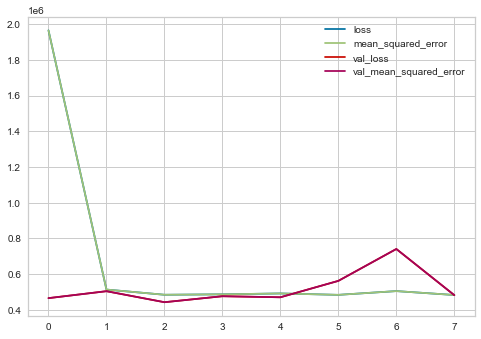

In [29]:
loss1 = pd.DataFrame(history1.history)
loss1.plot();

In [30]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               8704      
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1,059,841
Trainable params: 1,059,841
No

In [31]:
tahmin1 = model1.predict(x1_test)
r2_score(tahmin1, y1_test) * 100

96/96 [==============================] - 0s 4ms/step


60.00084842733271

## model 2

In [38]:
model2 = Sequential()
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(1, activation = 'relu'))

model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
history2 = model2.fit(x2_train, y2_train, validation_data = (x2_test, y2_test), 
                    epochs = 100, callbacks = [erken_durma], verbose = 1)

Epoch 1/100
383/383 [==============================] - 10s 22ms/step - loss: 1594434.0000 - val_loss: 527586.2500
Epoch 2/100
383/383 [==============================] - 8s 21ms/step - loss: 518327.2188 - val_loss: 484738.9688
Epoch 3/100
383/383 [==============================] - 8s 21ms/step - loss: 550245.3125 - val_loss: 451413.9688
Epoch 4/100
383/383 [==============================] - 8s 20ms/step - loss: 529331.9375 - val_loss: 641152.3125
Epoch 5/100
383/383 [==============================] - 7s 19ms/step - loss: 525224.5625 - val_loss: 452283.8438
Epoch 6/100
383/383 [==============================] - 7s 20ms/step - loss: 496958.3438 - val_loss: 536900.3125
Epoch 7/100
383/383 [==============================] - 7s 20ms/step - loss: 518949.8125 - val_loss: 597588.3125
Epoch 8/100
383/383 [==============================] - 8s 20ms/step - loss: 501888.4688 - val_loss: 437288.1562
Epoch 9/100
383/383 [==============================] - 8s 21ms/step - loss: 488547.0938 - val_loss: 50

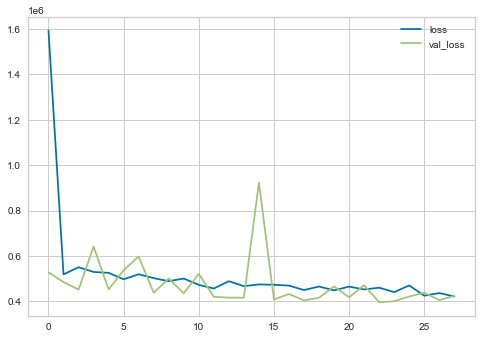

In [40]:
loss2 = pd.DataFrame(history2.history)
loss2.plot();

In [41]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               3584      
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 128)              

In [42]:
tahmin2 = model2.predict(x2_test)
r2_score(tahmin2, y2_test) * 100

96/96 [==============================] - 1s 5ms/step


66.98348701927894

## test verisi

In [44]:
test_data = pd.read_csv('test.csv')
test_id = test_data['id']
Yusuf2.sadece_boslari_doldur(test_data)

## makine öğrenmesi algoritmalarından lasso'yu kullanacağız.

In [46]:
l = Lasso()
l.fit(x1, y1)
tahmin = l.predict(test_data)
tahmin

array([4398.20377495, 6086.51088412, 7246.10679543, ..., 6808.72917197,
       4485.33140107, 7400.54012919])

In [47]:
sonuc = pd.DataFrame(columns = ['id', 'yield'])
sonuc['id'] = test_id
sonuc['yield'] = tahmin
sonuc

,id,yield
0,15289,4398.203775
1,15290,6086.510884
2,15291,7246.106795
3,15292,5004.333842
4,15293,3715.108811
...,...,...
10189,25478,5435.856880
10190,25479,5826.049188
10191,25480,6808.729172
10192,25481,4485.331401


In [48]:
sonuc.to_csv('sonuc.csv', index = False)